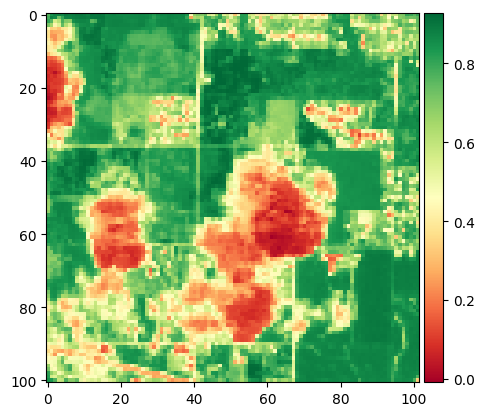

In [4]:
#SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
from re import L
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import os

#def ndvi_indec_vegetation ( image_data, bands ):


#Seleccionar carpeta con los archivos
os.listdir('C:/Users/ricar/Downloads/back+/images/')
#Open images
#VIS RED
b4 = rasterio.open('C:/Users/ricar/Downloads/back+/images/S-HARMONIZED_20210802T170849_20210802T171859_T15TVG_02Aug2021_B4.tif') #red
#b4 = image_data["B3"]

#NIR
b8 = rasterio.open('C:/Users/ricar/Downloads/back+/images/S-HARMONIZED_20210802T170849_20210802T171859_T15TVG_02Aug2021_B8.tif') #nir
#b8 = image_data["B8"]
#Valor de L
l=0
#View image size
b4.height
b4.width
#to know what kind of band it is 
b4.dtypes[0]
#raster reference
b4.crs
#raster parameters
b4.transform
#raster transform parameters
b4.read(1)
#Change the arrays to float64 to accept division and decimals.
visr = b4.read(1).astype('float64')
nir = b8.read(1).astype('float64')
nir

#Calculate the SAVI 
#SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
savi=np.where(
    #To eliminate the division by 0; when we know that the denominator is 0 we give the value of 0 automatically.
    (visr+nir + l)==0., 
    0, 
    #If this is not the case, we proceed to calculate the NDVI.
    ((nir-visr)/(visr+nir + l) ) * (1+l)
    )
savi


#Now we take the generated image and display it with the NDVI values.
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
#We select the color map.mro
im = ax.imshow(savi, cmap='RdYlGn')
#Add colorbar
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()